In [1]:
import pandas as pd
import joblib
import numpy as np
import torch
import torch.optim as optim
import warnings 
warnings.simplefilter('ignore')
from torch.nn import Linear,ReLU,Sigmoid
from utils import *
torch.cuda.is_available()

True

In [2]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')

tag['TAG'] = [str(i).replace('TI','TJ') for i in tag['TAG'].values]

temp = tag[tag['TAG']=='MLPAP_TJC-0757A.PV'].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

tag_map = dict(zip(tag['TAG'],tag['chinese']))
tag_map

{'MLPAP_TJC-0627.PV': 'OX預熱器出口溫度',
 'MLPAP_TRC-0610.PV': '空氣預熱器出口溫度',
 'MLPAP_FR-0632.PV': '汽機風量',
 'MLPAP_FQ-0619.PV': 'OX入料量',
 'MLPAP_TJC-0757A.PV': '反應槽鹽浴溫度',
 'MLPAP_PIC-0741.PV': '汽鼓(V211)鍋爐水壓力',
 'MLPAP_LIC-0738.PV': '汽鼓(V211)鍋爐水液位',
 'MLPAP_PIC-0761.PV': '鹽浴冷卻器(E112)出口壓力',
 'MLPAP_TRC-0762.PV': '鹽浴冷卻器(E112)入口溫度',
 'MLPAP_LRC-0729.PV': '鍋爐水液位控制',
 'MLPAP_TJC-1721.PV': '轉換式冷凝器冷油溫度',
 'MLPAP_TRC-1734.PV': '轉換式冷凝器熱油溫度',
 'MLPAP_TJR-0721.PV': '反應槽出口溫度',
 'MLPAP_TJ-0706A01': '反應槽觸媒溫度(CL1)_高度(1900)',
 'MLPAP_TJ-0706A02': '反應槽觸媒溫度_高度(1010)',
 'MLPAP_TJ-0706B01': '反應槽觸媒溫度_高度(2865)',
 'MLPAP_TJ-0706C01': '反應槽觸媒溫度_高度(400)',
 'MLPAP_TJ-0706D01': '反應槽觸媒溫度_高度(2230)',
 'MLPAP_TJ-0706E01': '反應槽觸媒溫度(CL1)_高度(1310)',
 'MLPAP_TJ-0716A01': '反應槽觸媒溫度(CL1)_高度(1160)',
 'MLPAP_TJ-0716B01': '反應槽觸媒溫度_高度(700)',
 'MLPAP_TJ-0716C01': '反應槽觸媒溫度_高度(2715)',
 'MLPAP_TJ-0716D01': '反應槽觸媒溫度_高度(1650)',
 'MLPAP_TJ-0716D02': '反應槽觸媒溫度(CL2)_高度(2380)',
 'MLPAP_TJ-0716E01': '反應槽觸媒溫度(CL0)_高度(550)',
 'MLPAP_FQI-0997.PV': '粗P

In [3]:
critic = joblib.load('./model/net.pkl')
critic.eval()
mm_x = joblib.load('./model/mm_x.pkl')
mm_y = joblib.load('./model/mm_y.pkl')

# def columns

In [4]:
x_cols = [#'MLPAP_FQ-0619.PV',
          'MLPAP_FR-0632.PV',
          'MLPAP_LIC-0738.PV',
          'MLPAP_LRC-0729.PV',
          'MLPAP_PIC-0761.PV',
          'MLPAP_TJ-0757B.PV',
          'MLPAP_TJC-0627.PV',
          'MLPAP_TJC-0757.PV',
          'MLPAP_TJC-0757A.PV',
          'MLPAP_TJC-1721.PV',
          'MLPAP_TRC-0610.PV',
          'MLPAP_TRC-0747.PV',
          'MLPAP_TRC-0762.PV',
          'MLPAP_TRC-1734.PV']
x_cols = sorted(x_cols)
x_cols.insert(0,'MLPAP_FQ-0619.PV')
x_cols

['MLPAP_FQ-0619.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_LIC-0738.PV',
 'MLPAP_LRC-0729.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TJC-0757.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TRC-1734.PV']

In [5]:
y_cols = ['MLPAP_FQI-0997.PV']

# critic forward test

In [6]:
x = np.random.normal(loc=0,scale=1,size=(39,14))
x = pd.DataFrame(x,columns=x_cols)
x.head()

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,-0.734283,-1.044909,-0.969543,1.371582,-0.232152,-0.653555,-1.170081,-0.609227,0.446984,2.490607,0.074437,0.369496,-0.586798,0.939174
1,-0.648304,-0.084942,-0.270173,-0.172567,-1.256045,0.372874,-1.160600,-2.262673,-0.966499,-0.066140,-0.165131,-0.354878,2.077732,-1.207794
2,0.179368,0.123983,-1.267097,1.270612,0.529538,0.762212,-0.368322,-0.977576,0.221429,0.600391,0.898311,0.430615,1.524791,2.055863
3,-1.005098,-0.758652,0.018045,1.566669,2.055178,0.456414,0.417965,0.971399,0.412720,0.320246,0.034453,-0.307903,-1.720666,-0.453297
4,-2.554305,-0.073284,-1.720890,0.517915,-3.041014,1.243481,-0.679947,-0.008100,0.448538,-0.191142,-1.463892,0.279761,-0.868789,-0.275825


In [7]:
y = critic(torch.tensor(x.values.reshape(-1,39*14)).cuda())
print(y)
y = mm_y.inverse_transform(y.detach().cpu().numpy())
y

tensor([[1.6171e-15]], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward>)


array([[5000.]])

# build generator

In [8]:
def build_generator(input_shape,output_shape):
    net = torch.nn.Sequential(
        Linear(input_shape,256),
        ReLU(),
        Linear(256,output_shape),
        Sigmoid()
    )
    return net

In [9]:
def init_weights(m):
  if hasattr(m,'weight'):
    torch.nn.init.xavier_uniform(m.weight)
  if hasattr(m,'bias'):  
    m.bias.data.fill_(0)

In [10]:
net = build_generator(1,39*14).double().cuda()
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=546, bias=True)
  (3): Sigmoid()
)

# noise_iter

In [11]:
noise = torch.tensor(np.random.normal(loc=0,scale=1,size=(5000,1))).cuda()
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

# obj function

In [12]:
obj_function = lambda x:critic(x).mean()

# optimizer

In [13]:
optimizer = optim.Adam(net.parameters(),lr=1e-4)

# train

In [14]:
def train(net,noise_iter,obj_function,optimizer,num_epochs=100):
    train_history = []
    for epoch in range(num_epochs):
        train_avg_loss = 0
        t = 0
        for noise in noise_iter:
            noise = noise[0]
            z = net(noise).cuda()
            loss = obj_function(z)
            loss *= -1
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_avg_loss += loss.item()
            t += 1
        train_avg_loss /= t
        print("epochs {} loss {:.4f}".format(epoch,train_avg_loss))
        train_history.append(train_avg_loss)
    # plt train loss
    plt.plot(np.array(train_history))
    plt.title('train loss')
    # return trained net
    return net

epochs 0 loss -0.3709
epochs 1 loss -0.4323
epochs 2 loss -0.5074
epochs 3 loss -0.5888
epochs 4 loss -0.6644
epochs 5 loss -0.7299
epochs 6 loss -0.7844
epochs 7 loss -0.8274
epochs 8 loss -0.8597
epochs 9 loss -0.8839
epochs 10 loss -0.9021
epochs 11 loss -0.9164
epochs 12 loss -0.9279
epochs 13 loss -0.9373
epochs 14 loss -0.9449
epochs 15 loss -0.9511
epochs 16 loss -0.9563
epochs 17 loss -0.9606
epochs 18 loss -0.9644
epochs 19 loss -0.9676
epochs 20 loss -0.9704
epochs 21 loss -0.9728
epochs 22 loss -0.9749
epochs 23 loss -0.9768
epochs 24 loss -0.9784
epochs 25 loss -0.9798
epochs 26 loss -0.9811
epochs 27 loss -0.9822
epochs 28 loss -0.9832
epochs 29 loss -0.9842
epochs 30 loss -0.9850
epochs 31 loss -0.9858
epochs 32 loss -0.9865
epochs 33 loss -0.9871
epochs 34 loss -0.9877
epochs 35 loss -0.9883
epochs 36 loss -0.9888
epochs 37 loss -0.9892
epochs 38 loss -0.9897
epochs 39 loss -0.9901
epochs 40 loss -0.9905
epochs 41 loss -0.9909
epochs 42 loss -0.9912
epochs 43 loss -0.991

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=546, bias=True)
  (3): Sigmoid()
)

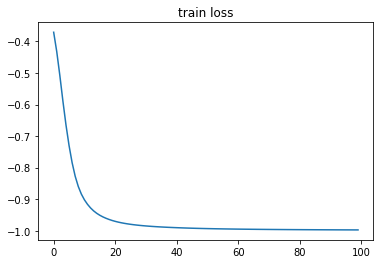

In [15]:
train(net,noise_iter,obj_function,optimizer,num_epochs=100)

# result

In [16]:
output = critic(net(noise)).detach().cpu().numpy()
output = mm_y.inverse_transform(output)
output = pd.DataFrame(output,columns=['0997'])
output

,0997
0,9985.995080
1,9990.784649
2,9988.292853
3,9985.981946
4,9988.476487
...,...
4995,9986.235184
4996,9988.191890
4997,9986.396336
4998,9987.727981


In [17]:
best_idx = np.argmax(output.values)
output.loc[[best_idx]]

,0997
3551,9993.739469


In [18]:
result = pd.DataFrame(net(noise).detach().cpu().numpy())
result[:] = mm_x.inverse_transform(result)
r1 = result.iloc[best_idx,:].values.reshape(39,14)
r1 = pd.DataFrame(r1,columns=x_cols)
r1.loc['median'] = r1.median(axis=0)
r1

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,7917.323445,86.636504,59.649841,59.990417,40.025406,364.989265,158.440536,2.994634,345.002106,67.998368,160.052424,100.042918,345.063922,199.501682
1,7914.635991,85.533307,59.856950,28.434188,40.005677,345.032617,140.200477,-2.981528,364.415543,55.245424,160.016640,100.055118,345.204935,188.449519
2,7942.064502,86.653921,22.121204,30.063379,49.944373,345.030578,140.012125,-2.987043,364.977842,55.051256,160.014159,100.482907,345.023862,199.996933
3,7924.802704,86.795668,20.047592,59.934912,49.943429,364.890071,158.100202,2.995873,345.049252,55.082215,160.076460,100.571106,345.013626,160.016604
4,7938.975944,86.777089,59.810645,59.992240,40.001546,345.003153,140.043438,-2.790038,364.991081,55.108197,160.135485,177.918849,345.005753,199.978578
5,7940.153478,53.947733,59.871374,57.897100,49.909903,345.038891,140.099121,-1.768497,345.010957,55.002750,160.091822,199.972085,345.380338,199.815994
6,7937.638085,86.814900,59.915769,59.979390,40.203144,345.013778,140.101366,-2.998966,345.033252,67.952836,199.979597,100.019936,363.485762,160.011204
7,7941.716625,86.831153,59.988106,59.982813,40.007868,345.088780,151.692614,-2.719323,364.990229,67.619808,199.937615,100.451078,345.101333,160.605071
8,7749.276749,86.816930,59.999563,20.011514,40.013390,364.921767,140.058511,2.987167,345.739613,55.085133,160.024819,101.906530,364.987428,160.526311
9,7929.428349,86.677086,20.273416,59.946782,49.910776,345.066750,159.848423,2.999119,345.012939,55.025942,160.006739,136.888874,345.592687,160.009030


In [19]:
r1 = r1.loc[['median']].T
r1['chinese'] = r1.index.map(tag_map)
r1 = r1[['chinese','median']]

In [20]:
print('best control factor maybe:')
r1

best control factor maybe:


,chinese,median
MLPAP_FQ-0619.PV,OX入料量,7929.428349
MLPAP_FR-0632.PV,汽機風量,86.677086
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,59.228368
MLPAP_LRC-0729.PV,鍋爐水液位控制,56.562917
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,40.040453
MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,346.477634
MLPAP_TJC-0627.PV,OX預熱器出口溫度,159.756404
MLPAP_TJC-0757.PV,反應器A/B側鹽浴溫度差,2.414933
MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,345.101912
MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,55.304162
